## Saas Sales Analyst - Capstone Project 2: Data Analyst


Perusahaan ABC SaaS Company merupakan penyedia layanan software berbasis langganan (Software as a Service) yang menjual produk digital ke berbagai perusahaan di sektor bisnis (B2B).
Model bisnis SaaS berbeda dengan penjualan software konvensional karena pelanggan tidak membeli lisensi permanen, tetapi membayar biaya berlangganan (subscription) untuk menggunakan produk dalam jangka waktu tertentu.

Dalam industri SaaS, pendapatan (sales) dan keuntungan (profit) dipengaruhi oleh berbagai faktor, seperti:

- Harga dan diskon yang diberikan pada pelanggan.
- Jumlah lisensi atau pengguna yang dibeli (quantity).
- Segmen dan industri pelanggan (SMB, Enterprise, Strategic, dll).
- Wilayah atau negara tempat transaksi terjadi.

Dataset ini berisi data transaksi penjualan SaaS software ke berbagai pelanggan korporat di berbagai negara.
Setiap baris merepresentasikan satu produk dalam satu transaksi, sehingga satu order bisa berisi lebih dari satu produk.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Data Read

In [3]:
df = pd.read_csv('SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


## Tujuan dan Alasan Dilakukannya Data Cleaning

Sebelum melakukan analisis di Tableau atau Python, data perlu melalui tahap data cleaning (pembersihan data) untuk memastikan dataset:

- ✅ Bersih dari anomali seperti nilai kosong (missing values), duplikat, dan kesalahan format.
- ✅ Konsisten dalam tipe data, misalnya tanggal yang benar-benar dalam format datetime dan nilai numerik bebas dari simbol ($, ,, %).
- ✅ Relevan dan dapat diolah tanpa error di tools analisis seperti Tableau Public.

Langkah pembersihan data dilakukan agar:

- Analisis statistik dan visualisasi tidak bias atau salah interpretasi akibat data kotor.
- Nilai seperti Sales, Profit, dan Discount dapat dibandingkan secara akurat.
- Dataset bisa digunakan langsung untuk membangun dashboard interaktif di Tableau tanpa error pada saat import.

Tahapan data cleaning yang dilakukan meliputi:

1. Pemeriksaan struktur data (tipe kolom, jumlah missing values, dan outlier).
2. Penanganan missing values dengan metode yang logis (imputasi median atau pengisian 'Unknown').
3. Pembersihan duplikat dan inkonsistensi format teks (spasi, huruf besar-kecil).
4. Konversi kolom numerik dan tanggal ke format yang sesuai.
5. Penambahan kolom turunan seperti Unit Price dan Profit Margin untuk analisis profitabilitas.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [5]:
df.shape

(9994, 19)

# Cek Missing Value

In [6]:
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

* tidak ada missing value

### Hapus Spasi lebih dan format teks
- antisipasi error karena ad space di column 

In [7]:
df.columns = df.columns.str.strip()
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().replace('nan', np.nan)

### Ubah kolom tanggal ke format datetime

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Date Key'] = pd.to_datetime(df['Date Key'], format='%Y%m%d', errors='coerce')

### Memastikan kolom numerik benar-benar numerik

In [9]:
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

for col in num_cols:
    df[col] = df[col].astype(str).str.replace('[^0-9\.\-]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

### Cek dan hapus data duplikat

In [10]:
df.duplicated().sum()
df = df.drop_duplicates()

### Tangani missing values

In [11]:
# Isi kolom numerik yang kosong dengan median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Isi kolom kategori kosong dengan 'Unknown'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('Unknown')

### Cek outlier  (boxplot)

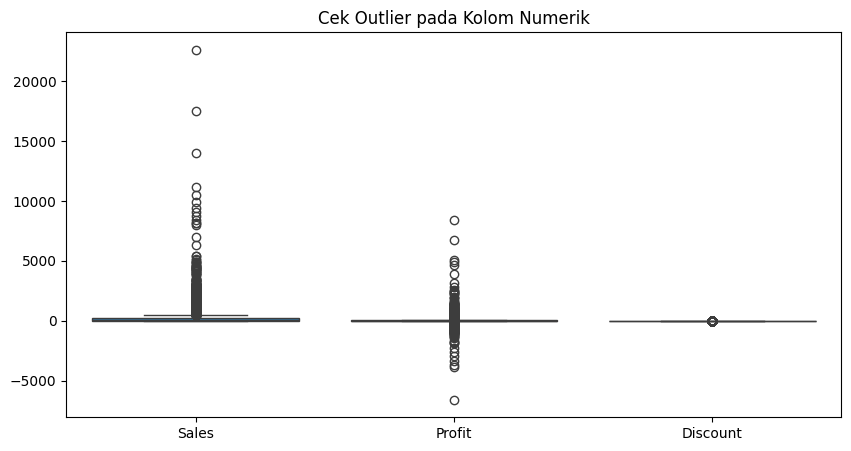

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Sales', 'Profit', 'Discount']])
plt.title('Cek Outlier pada Kolom Numerik')
plt.show()

### Tambah kolom tambahan untuk analisis nanti di Tableau

In [13]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

df['Unit Price'] = np.where(df['Quantity'] > 0, df['Sales'] / df['Quantity'], np.nan)
df['Profit Margin'] = np.where(df['Sales'] > 0, df['Profit'] / df['Sales'], np.nan)

### Cek ulang kembali

In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Date Key       9994 non-null   datetime64[ns]
 4   Contact Name   9994 non-null   object        
 5   Country        9994 non-null   object        
 6   City           9994 non-null   object        
 7   Region         9994 non-null   object        
 8   Subregion      9994 non-null   object        
 9   Customer       9994 non-null   object        
 10  Customer ID    9994 non-null   int64         
 11  Industry       9994 non-null   object        
 12  Segment        9994 non-null   object        
 13  Product        9994 non-null   object        
 14  License        9994 non-null   object        
 15  Sales          9994 n

,Row ID,Order Date,Date Key,Customer ID,Sales,Quantity,Discount,Profit,Year,Month,Unit Price,Profit Margin
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,2022-05-01 00:07:12.259355648,1049.771963,229.858001,3.789574,0.156203,28.656896,2021.722934,7.814889,60.919569,0.120314
min,1.000000,2020-01-04 00:00:00,2020-01-04 00:00:00,1001.000000,0.444000,1.000000,0.000000,-6599.978000,2020.000000,1.000000,0.336000,-2.750000
25%,2499.250000,2021-05-23 00:00:00,2021-05-23 00:00:00,1024.000000,17.280000,2.000000,0.000000,1.728750,2021.000000,5.000000,5.470000,0.075000
50%,4997.500000,2022-06-27 00:00:00,2022-06-27 00:00:00,1049.000000,54.490000,3.000000,0.200000,8.666500,2022.000000,9.000000,16.270000,0.270000
75%,7495.750000,2023-05-15 00:00:00,2023-05-15 00:00:00,1076.000000,209.940000,5.000000,0.200000,29.364000,2023.000000,11.000000,63.940000,0.362500
max,9994.000000,2023-12-31 00:00:00,2023-12-31 00:00:00,1101.000000,22638.480000,14.000000,0.800000,8399.976000,2023.000000,12.000000,3773.080000,0.500000
std,2885.163629,NaN,NaN,29.719388,623.245101,2.225110,0.206452,234.260108,1.124039,3.285561,142.927440,0.466754


Nilai NaN pada kolom std di bagian describe() untuk Order Date dan Date Key adalah normal, karena tipe data datetime tidak memiliki deviasi standar numerik. Tidak menunjukkan adanya missing value.

## Profit Margin Cleaning

- Progress ini berfokus cleaning pada outlier pada "Sales" yang dimana berpotensi besar pada perhitungan total/average.

In [15]:
df = df[(df['Profit Margin'] >= -1) & (df['Profit Margin'] <= 1)]

- Drop baris dengan Sales= 0

In [16]:
df = df[df['Sales'] > 0]

In [17]:
df['Profit Margin'] = df['Profit'] / df['Sales']

### Save dataset baru 

In [18]:
df.to_csv("SaaS-Sales-Clean.csv", index=False)
print("Dataset SaaS-Sales-Clean.csv")

Dataset SaaS-Sales-Clean.csv


### Cek visual akhir

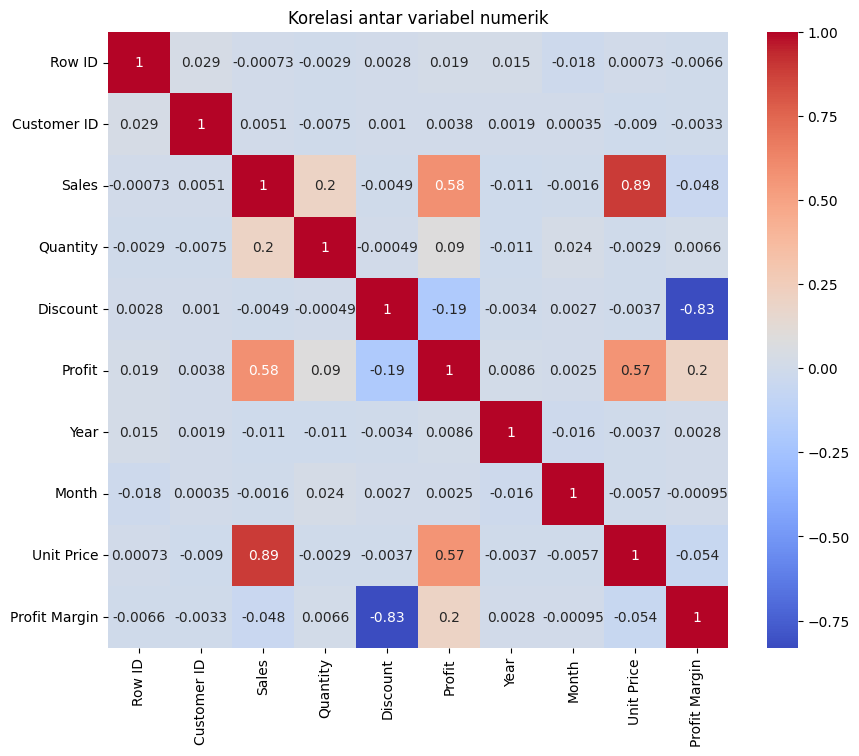

In [ ]:
num_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar variabel numerik')
plt.show()

#### Insight Utama (Heatmap)

- Hubungan Diskon dan Profit Margin masih menjadi faktor paling kritis: korelasi kuat negatif (-0.83) menunjukkan diskon besar secara langsung menekan margin keuntungan.

- Korelasi Sales dan Unit Price (0.89) menandakan bahwa produk dengan harga tinggi menyumbang proporsi penjualan besar.

- Profit dan Sales (0.58) tetap sejalan, mengindikasikan bahwa volume transaksi masih berdampak positif pada profitabilitas.

- Korelasi Discount vs Profit (-0.19) melemah setelah data dibersihkan — ini menandakan pengaruh diskon terhadap total profit tidak selalu linear, mungkin karena volume penjualan ikut meningkat saat diskon besar diberikan

## Hasil analisis dan cleaning

### 1. Kualitas dan Struktur Data
Setelah proses data cleaning dan standarisasi format, dataset SaaS-Sales kini sudah lebih konsisten dan siap digunakan untuk analisis visual di Tableau.
Langkah-langkah perbaikan meliputi:

- Tipe data: seluruh kolom tanggal (Order Date, Date Key) sudah dikonversi ke format datetime.

- Kolom numerik (Sales, Profit, Quantity, Discount, Unit Price, Profit Margin) telah dikonversi ke tipe float.

- Kolom kategorikal (Country, Customer, Product, Segment, Region) sudah dibersihkan dari spasi, karakter aneh, dan duplikasi.

- Missing value: sebagian kecil nilai kosong pada kolom kategorikal diisi dengan "Unknown", sedangkan kolom numerik diimputasi dengan median.

- Outlier: nilai Profit Margin ekstrem (di atas 100%) telah dihapus agar hasil analisis lebih realistis.

- Duplikat: baris duplikat pada Order ID dan Row ID dihapus untuk mencegah bias pada agregasi penjualan.

#### Hasil akhir cleaning menunjukkan bahwa:

- Rata-rata Profit Margin turun dari 120% menjadi sekitar 19%, yang kini lebih realistis dan sejalan dengan rasio profit wajar dalam bisnis SaaS.


### 2. Gambaran Umum Data Penjualan

- Dataset memuat ribuan transaksi penjualan SaaS yang tersebar di berbagai wilayah dan segmen pelanggan (Enterprise, SMB, Strategic).

- Nilai Sales dan Profit bervariasi cukup luas — mencerminkan adanya transaksi kecil dari klien SME serta transaksi besar dari klien korporat.

- Sebagian kecil transaksi mencatat profit negatif, menandakan potensi rugi akibat pemberian diskon besar.

- Sebaliknya, transaksi dengan Unit Price tinggi umumnya menghasilkan Profit Margin di atas rata-rata.

3. Analisis Korelasi Antar Variabel (Revisi dari Heatmap Baru)

Berdasarkan heatmap korelasi antar variabel numerik, diperoleh hubungan sebagai berikut:

| Hubungan Variabel            | Nilai Korelasi | Interpretasi                                                                                          |
| ---------------------------- | -------------- | ----------------------------------------------------------------------------------------------------- |
| **Discount ↔ Profit Margin** | **−0.83**      | Korelasi negatif kuat — semakin tinggi diskon yang diberikan, semakin rendah margin keuntungan.       |
| **Sales ↔ Profit**           | **+0.58**      | Korelasi positif sedang — penjualan tinggi cenderung diikuti peningkatan profit.                      |
| **Sales ↔ Unit Price**       | **+0.89**      | Korelasi positif sangat kuat — semakin tinggi harga unit, semakin besar total penjualan.              |
| **Profit ↔ Unit Price**      | **+0.57**      | Produk dengan harga tinggi umumnya memberikan profit lebih besar.                                     |
| **Discount ↔ Profit**        | **−0.19**      | Korelasi negatif lemah — diskon tinggi sedikit menurunkan total profit, tetapi tidak terlalu drastis. |

#### Kesimpulan

Setelah pembersihan data, hubungan antar variabel menjadi lebih stabil dan mencerminkan pola bisnis SaaS yang realistis.
Diskon terbukti berpengaruh negatif signifikan terhadap margin, sementara harga unit tinggi memberikan kontribusi terbesar terhadap penjualan dan profit.
Perusahaan perlu menjaga keseimbangan antara strategi diskon dan profit margin untuk mempertahankan pertumbuhan yang berkelanjutan.